In [1]:
from gan.gan import CycleGAN, train_one_epoch, checkpoint_save
from gan.data import ImageDataset, ImageDataLoader
import torch
from pprint import pprint

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print( torch.cuda.get_device_properties(device) )


monet_dataset = ImageDataset(data_dir="../data/gan-getting-started/monet_jpg")
photo_dataset = ImageDataset(data_dir="../data/gan-getting-started/photo_jpg")

monet_dataloader = ImageDataLoader(monet_dataset)
photo_dataloader = ImageDataLoader(photo_dataset)


_CudaDeviceProperties(name='NVIDIA GeForce RTX 3070', major=8, minor=6, total_memory=8191MB, multi_processor_count=46, uuid=0e2d35a6-9344-fc39-0a99-bd4343293f22, L2_cache_size=4MB)


In [5]:
model = CycleGAN()
monet_gen_optim = torch.optim.Adam(model.parameters(), lr=2e-4, betas=(0.5, 0.999))
photo_gen_optim = torch.optim.Adam(model.parameters(), lr=2e-4, betas=(0.5, 0.999))
monet_dis_optim = torch.optim.Adam(model.parameters(), lr=2e-4, betas=(0.5, 0.999))
photo_dis_optim = torch.optim.Adam(model.parameters(), lr=2e-4, betas=(0.5, 0.999))

loss_tracker = train_one_epoch(monet_dataloader=monet_dataloader, 
                photo_dataloader=photo_dataloader,
                monet_gen_optim=monet_gen_optim, 
                photo_gen_optim=photo_gen_optim,
                monet_dis_optim=monet_dis_optim,
                photo_dis_optim=photo_dis_optim,
                model=model, 
                device=device)

Training 0-th batch...
Training 1-th batch...
Training 2-th batch...
Training 3-th batch...
Training 4-th batch...
Training 5-th batch...
Training 6-th batch...
Training 7-th batch...
Training 8-th batch...
Training 9-th batch...
Training 10-th batch...
Training 11-th batch...
Training 12-th batch...
Training 13-th batch...
Training 14-th batch...
Training 15-th batch...
Training 16-th batch...
Training 17-th batch...
Training 18-th batch...
Training 19-th batch...
Training 20-th batch...
Training 21-th batch...
Training 22-th batch...
Training 23-th batch...
Training 24-th batch...
Training 25-th batch...
Training 26-th batch...
Training 27-th batch...
Training 28-th batch...
Training 29-th batch...


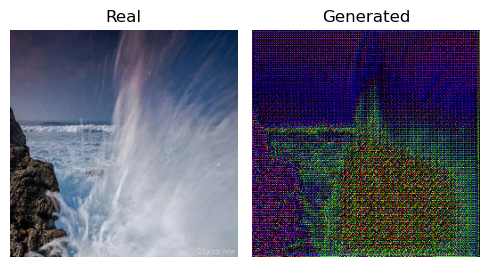

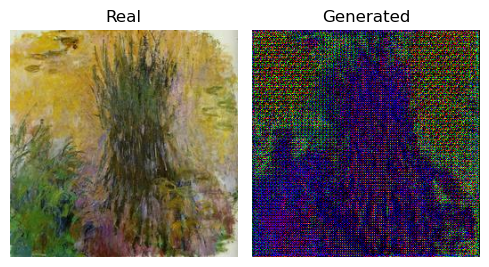

In [3]:
from gan.plotting_utility import plot_before_after
idx = 20

input = photo_dataset[idx]
output = model.generate_monet(input)

fig = plot_before_after(input, output)
fig.show()


input = monet_dataset[idx]
output = model.generate_photo(input)

fig = plot_before_after(input, output)
fig.show()



In [9]:
checkpoint_save(epoch=1, 
                save_path=".", 
                model=model,
                monet_gen_optim=monet_gen_optim,
                photo_gen_optim=photo_gen_optim, 
                monet_dis_optim=monet_dis_optim,
                photo_dis_optim=photo_dis_optim,
                loss_tracker=loss_tracker)

RuntimeError: File /home/anthony/github/kaggle_kernels/gan/notebooks cannot be opened.